In [ ]:
import math
import numpy
import pandas
from matplotlib import pyplot

In [ ]:
hetero = False
inputfile1 = "Katu1.csv"

# hetero=True
# inputfile1="Katu1.csv"
# inputfile2="Katu1.csv"

left_large = True
dynamic = True
num_contour = 16

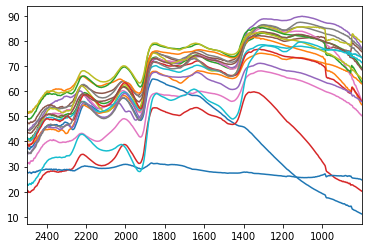

In [ ]:
# file read
Katu1 = pandas.read_csv(inputfile1, header=0, index_col=0).T
if hetero == False:
    inputfile2 = inputfile1
Katu2 = pandas.read_csv(inputfile2, header=0, index_col=0).T
if len(Katu1) != len(Katu2):
    raise Exception("data mismatching")
Katu1.T.plot(legend=None)
if left_large: pyplot.xlim(max(Katu1.columns), min(Katu1.columns))
if hetero:
    Katu2.T.plot(legend=None)
    if left_large: pyplot.xlim(max(Katu2.columns), min(Katu2.columns))
if dynamic:
    Katu1 = Katu1 - Katu1.mean()
    Katu2 = Katu2 - Katu2.mean()

In [ ]:
def contourplot(Katu1):
    x = Katu1.columns[0:].astype(float)
    y = Katu1.index[0:].astype(float)
    z = Katu1.values
    zmax = numpy.absolute(z).max()
    pyplot.figure(figsize=(6, 6))
    pyplot.contour(x, y, z, num_contour, cmap="bwr", vmin=-1 * zmax, vmax=zmax)
    # pyplot.pcolormesh(x,y,z,cmap='jet',vmin=-1*zmax,vmax=zmax)
    if left_large:
        pyplot.xlim(max(x), min(x))
        pyplot.ylim(max(y), min(y))

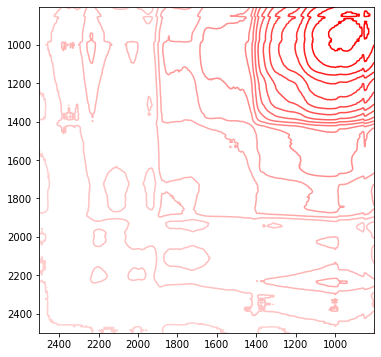

In [ ]:
# synchronous correlation
sync = pandas.DataFrame(Katu1.values.T @ Katu2.values / (len(Katu1) - 1))
sync.index = Katu1.columns
sync.columns = Katu2.columns
sync = sync.T
contourplot(sync)
sync.to_csv(inputfile1[: len(inputfile1) - 4] + "_sync.csv")

In [ ]:
# Hilbert-Noda transformation matrix
noda = numpy.zeros((len(Katu1), len(Katu1)))
for i in range(len(Katu1)):
    for j in range(len(Katu1)):
        if i != j: noda[i, j] = 1 / math.pi / (j - i)

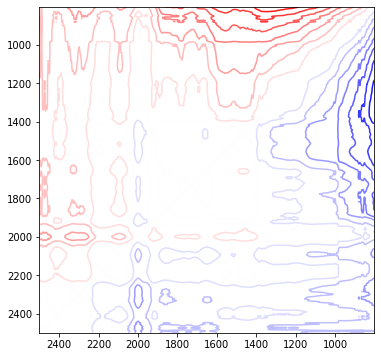

In [ ]:
#asynchronouse correlation
asyn = pandas.DataFrame(Katu1.values.T @ noda @ Katu2.values / (len(Katu1) - 1))
asyn.index = Katu1.columns
asyn.columns = Katu2.columns
asyn = asyn.T
contourplot(asyn)
asyn.to_csv(inputfile1[: len(inputfile1) - 4] + "_async.csv")

In [ ]:
!pip install numpy scipy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt